In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import heapq
from collections import defaultdict

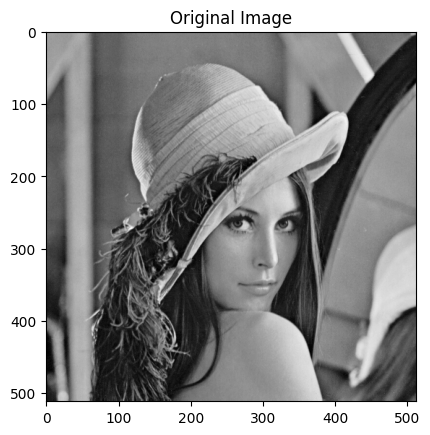

1th Finish reading an image in grayscale
  > Original Image Size: 262144 bytes




In [2]:
img = cv.imread('/Users/a/Documents/middleExam/lena.png',cv.IMREAD_GRAYSCALE)
original_size = img.nbytes
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()
print("1th Finish reading an image in grayscale")
print(f"  > Original Image Size: {original_size} bytes\n\n")

Total number of blocks: 4096


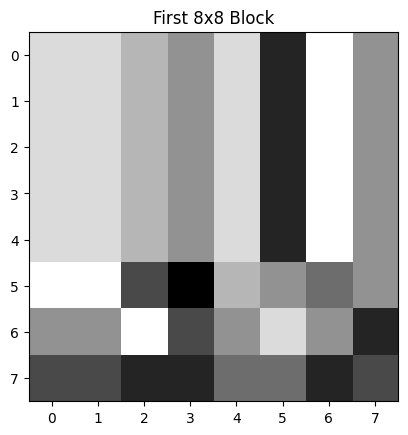

8
[[169 169 168 167 169 164 170 167]
 [169 169 168 167 169 164 170 167]
 [169 169 168 167 169 164 170 167]
 [169 169 168 167 169 164 170 167]
 [169 169 168 167 169 164 170 167]
 [170 170 165 163 168 167 166 167]
 [167 167 170 165 167 169 167 164]
 [165 165 164 164 166 166 164 165]]


In [3]:
# 블록 크기 설정
block_size = 8
BLOCK_SIZE = 8

# 이미지 크기 가져오기
h, w = img.shape

# 블록 단위로 이미지를 분할
blocks = [img[i:i+block_size, j:j+block_size] for i in range(0, h, block_size) for j in range(0, w, block_size)]

# 결과 확인
print(f"Total number of blocks: {len(blocks)}")
# 첫 번째 블록 출력 (예시)
plt.imshow(blocks[0], cmap='gray')
plt.title('First 8x8 Block')
plt.show()
print(len(blocks[0]))
print(blocks[0])

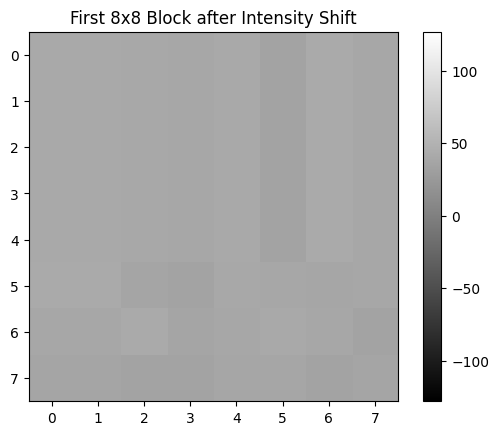

8
[[41. 41. 40. 39. 41. 36. 42. 39.]
 [41. 41. 40. 39. 41. 36. 42. 39.]
 [41. 41. 40. 39. 41. 36. 42. 39.]
 [41. 41. 40. 39. 41. 36. 42. 39.]
 [41. 41. 40. 39. 41. 36. 42. 39.]
 [42. 42. 37. 35. 40. 39. 38. 39.]
 [39. 39. 42. 37. 39. 41. 39. 36.]
 [37. 37. 36. 36. 38. 38. 36. 37.]]


In [4]:
shifted_blocks = [block.astype(np.float32) - 128 for block in blocks]

# 첫 번째 shifted block을 표시
plt.imshow(shifted_blocks[0], cmap='gray', vmin=-128, vmax=127)
plt.title('First 8x8 Block after Intensity Shift')
plt.colorbar()
plt.show()
print(len(shifted_blocks[0]))
print(shifted_blocks[0])

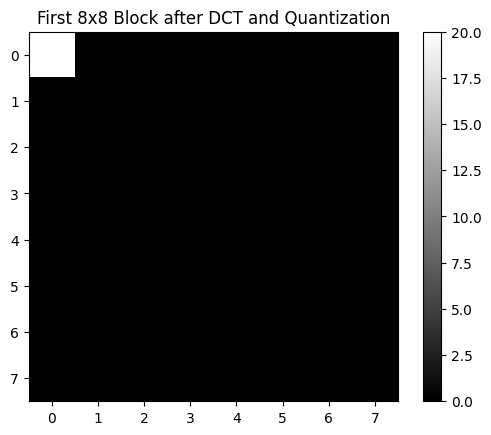

[[20.  0.  0.  0. -0. -0. -0.  0.]
 [ 0.  0.  0. -0.  0.  0. -0.  0.]
 [-0. -0. -0.  0. -0. -0.  0. -0.]
 [ 0.  0.  0.  0. -0. -0.  0.  0.]
 [-0. -0. -0. -0.  0.  0. -0.  0.]
 [ 0.  0. -0. -0. -0.  0.  0.  0.]
 [-0. -0.  0.  0.  0. -0. -0. -0.]
 [ 0. -0. -0. -0. -0.  0.  0.  0.]]
[[19.  1. -0.  0. -0.  0.  0. -0.]
 [ 1. -0.  0.  0. -0.  0.  0.  0.]
 [-0.  0. -0. -0.  0. -0. -0. -0.]
 [-0. -0.  0. -0.  0.  0. -0. -0.]
 [ 0.  0. -0.  0. -0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.  0. -0. -0.]
 [-0. -0.  0. -0.  0. -0. -0.  0.]
 [ 0.  0. -0.  0. -0.  0.  0. -0.]]


In [5]:
def apply_dct(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')
    
dct_blocks = [apply_dct(block) for block in shifted_blocks]
Q = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# DCT 블록 양자화
quantized_blocks = [np.round(block / Q) for block in dct_blocks]

# 첫 번째 DCT 및 양자화 블록 표시
plt.imshow(quantized_blocks[0], cmap='gray')
plt.title('First 8x8 Block after DCT and Quantization')
plt.colorbar()
plt.show()
print(quantized_blocks[0])
print(quantized_blocks[1])

In [6]:
   #Sixth Step, Scan in zigzag order
zigzag_indices = np.array([
    0, 1, 8, 16, 9, 2, 3, 10, 
    17, 24, 32, 25, 18, 11, 4, 5, 
    12, 19, 26, 33, 40, 48, 41, 34, 
    27, 20, 13, 6, 7, 14, 21, 28, 
    35, 42, 49, 56, 57, 50, 43, 36, 
    29, 22, 15, 23, 30, 37, 44, 51, 
    58, 59, 52, 45, 38, 31, 39, 46, 
    53, 60, 61, 54, 47, 55, 62, 63
])

def zigzag_order(block):
    flattened = block.ravel()
    zigzagged = np.array([flattened[index] for index in zigzag_indices])
    return zigzagged

zigzag_blocks = [zigzag_order(block) for block in quantized_blocks]
print("  > Result of zigzag scan(first block) : ", "\n", zigzag_blocks[0], "\n\n")
print("  > Result of zigzag scan(first block) : ", "\n", zigzag_blocks[1], "\n\n")
print(len(zigzag_blocks[0]))

  > Result of zigzag scan(first block) :  
 [20.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0.  0.
  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.
  0.  0. -0. -0.  0. -0.  0. -0.  0.  0.] 


  > Result of zigzag scan(first block) :  
 [19.  1.  1. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.
  0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0.
  0.  0.  0. -0.  0. -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.
  0. -0. -0. -0.  0. -0. -0.  0.  0. -0.] 


64


In [7]:
def run_length_encode(data):
    rle = []
    last_val = None
    count = 0
    for val in data:
        if val == last_val:
            count += 1
        else:
            if last_val is not None:
                rle.append((count, last_val))    
            last_val = val
        count = 1
        rle.append((count, last_val))
    return rle

rle_blocks = [run_length_encode(zigzag_block) for zigzag_block in zigzag_blocks]
print("  > rle_blocks[0] : ", rle_blocks[0])
print("  > rle_blocks[0] : ", rle_blocks[1])

  > rle_blocks[0] :  [(1, 20.0), (1, 20.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0)]
  > rle_blocks[0] :  [(1, 19.0), (1, 19.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0), (1, -0.0),

In [8]:
def build_huffman_tree(frequency):
    heap = [[wt, [sym, ""]] for sym, wt in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        low = heapq.heappop(heap)
        high = heapq.heappop(heap)
        for pair in low[1:]:
            pair[1] = '0' + pair[1]
        for pair in high[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [low[0] + high[0]] + low[1:] + high[1:])
    huffman_dict = dict(sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p)))
    return huffman_dict

def huffman_encode(data, huffman_dict):
    encoded_data = []
    for count, val in data:
        code = huffman_dict.get((count, val), '')
        encoded_data.append((code, (count, val)))
    return encoded_data

# Calculate frequency for run-length encoded data
frequency = defaultdict(int)
for rle in rle_blocks:
    for count, val in rle:
        frequency[(count, val)] += 1

# Build Huffman tree and generate Huffman codes
huffman_dict = build_huffman_tree(frequency)

# Huffman encode the run-length encoded data
huffman_encoded_blocks = [huffman_encode(rle, huffman_dict) for rle in rle_blocks]
print("huffman_encoded_blocks[0] : ", huffman_encoded_blocks[0])
print("huffman_encoded_blocks[0] : ", huffman_encoded_blocks[1])

huffman_encoded_blocks[0] :  [('000100100', (1, 20.0)), ('000100100', (1, 20.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), ('1', (1, 0.0)), 

In [9]:
def huffman_decode(encoded_data, huffman_dict):
    reverse_huffman_dict = {v: k for k, v in huffman_dict.items()}  # 코드를 원래 값으로 매핑
    decoded_data = []
    for code, _ in encoded_data:
        original_value = reverse_huffman_dict[code]
        decoded_data.append(original_value)
    return decoded_data

# 전체 huffman_encoded_blocks에 대해 허프만 디코딩 수행
decoded_blocks = [huffman_decode(encoded_block, huffman_dict) for encoded_block in huffman_encoded_blocks]

# 디코딩된 첫 번째 블록 출력
print("decoded_blocks[0] : ", decoded_blocks[0])
print("decoded_blocks[0] : ", decoded_blocks[1])
print(len(decoded_blocks[0]))

decoded_blocks[0] :  [(1, 20.0), (1, 20.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0)]
decoded_blocks[0] :  [(1, 19.0), (1, 19.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1

In [10]:
def rle_decode(rle_data):
    decoded_data = []  # 디코딩된 결과를 저장할 리스트
    for count, value in rle_data:  # RLE 데이터의 각 쌍에 대해 반복
        # 주어진 횟수만큼 값을 추가
        decoded_data.extend([value] * count)  # `count`만큼 `val`을 확장하여 추가
    del decoded_data[0]
    return decoded_data  # 디코딩된 결과 반환
    
decoded_rle_blocks = [rle_decode(block) for block in decoded_blocks]

print(decoded_rle_blocks[0])
print(decoded_rle_blocks[1])
print(len(decoded_rle_blocks[0]))

[20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[19.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
64


In [11]:
def zigzag_decode(block, block_size):
    # 초기 2D 배열을 생성합니다.
    n = block_size
    result = [[0] * n for _ in range(n)]
    index = 0

    # (x, y)가 2차원 배열의 좌표입니다. (i, j)가 대각선의 인덱스입니다.
    for i in range(2 * n - 1):
        if i % 2 == 0:
            # 대각선이 짝수 번째일 때, 우상향 대각선을 따라 값을 할당합니다.
            x = i if i < n else n - 1
            y = 0 if i < n else i - n + 1
            while x >= 0 and y < n:
                result[y][x] = block[index]
                index += 1
                x -= 1
                y += 1
        else:
            # 대각선이 홀수 번째일 때, 좌하향 대각선을 따라 값을 할당합니다.
            x = 0 if i < n else i - n + 1
            y = i if i < n else n - 1
            while x < n and y >= 0:
                result[y][x] = block[index]
                index += 1
                x += 1
                y -= 1

    return result

# 전체 RLE 디코딩된 블록에 대해서 지그재그 디코딩을 수행합니다.
block_size = 8  # 8x8 블록 크기로 가정합니다.
zigzag_decoded_blocks = [zigzag_decode(block, block_size) for block in decoded_rle_blocks]
print("zigzag_decoded_blocks[0] : \n", zigzag_decoded_blocks[0], "\n")
print("zigzag_decoded_blocks[1] : \n", zigzag_decoded_blocks[1], "\n")
print(len(zigzag_decoded_blocks[0]))

zigzag_decoded_blocks[0] : 
 [[20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]] 

zigzag_decoded_blocks[1] : 
 [[19.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]] 

8


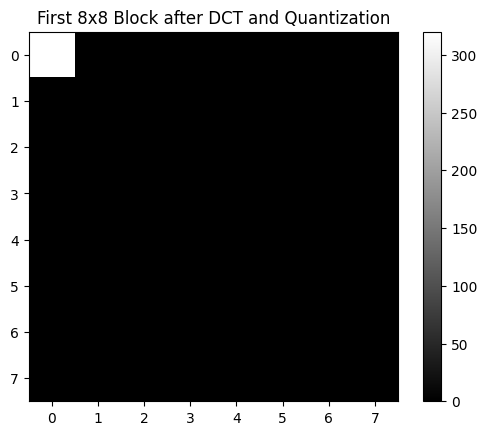

[[320.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
[[304.  11.  10.   0.   0.   0.   0.   0.]
 [ 12.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [12]:
quantization_table = np.array([
    16, 11, 10, 16, 24, 40, 51, 61,
    12, 12, 14, 19, 26, 58, 60, 55,
    14, 13, 16, 24, 40, 57, 69, 56,
    14, 17, 22, 29, 51, 87, 80, 62,
    18, 22, 37, 56, 68, 109, 103, 77,
    24, 35, 55, 64, 81, 104, 113, 92,
    49, 64, 78, 87, 103, 121, 120, 101,
    72, 92, 95, 98, 112, 100, 103, 99
]).reshape(8, 8)

def dequantize(block, quant_table):
    # 각 블록의 원소에 대응하는 양자화 테이블의 값으로 곱합니다.
    return block * quant_table

# 각 지그재그 디코딩된 블록을 dequantize합니다.
dequantized_blocks = [dequantize(np.array(block), quantization_table) for block in zigzag_decoded_blocks]


plt.imshow(dequantized_blocks[0], cmap='gray')
plt.title('First 8x8 Block after DCT and Quantization')
plt.colorbar()
plt.show()
print(dequantized_blocks[0])
print(dequantized_blocks[1])

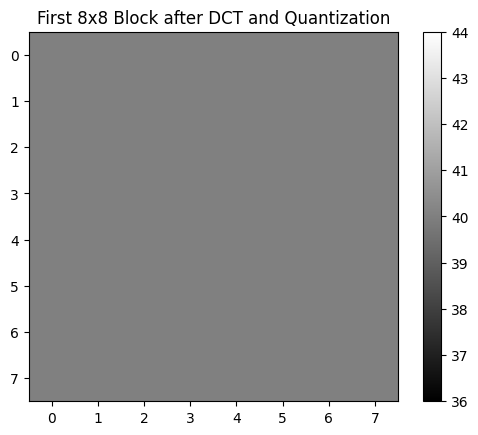

In [15]:
#Fifth Step, Inverse Discrete Cosine Transform
def apply_idct(block):
    idct_result = idct(idct(block.T, norm='ortho').T, norm='ortho')
    #print(f"IDCT Result: {idct_result}")  # Debugging: IDCT result
    return idct_result

# 각 dequantized 블록에 대해 IDCT를 적용합니다.
idct_blocks = [apply_idct(block) for block in dequantized_blocks]



plt.imshow(idct_blocks[0], cmap='gray')
plt.title('First 8x8 Block after DCT and Quantization')
plt.colorbar()
plt.show()

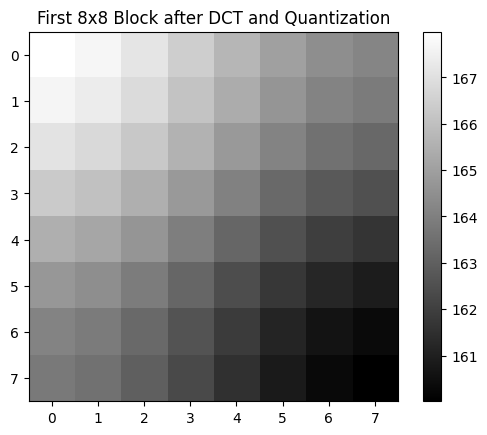

In [16]:
# Intensity level shifting을 적용하는 함수를 정의합니다.
def level_shift(block, shift_value=128):
    return block + shift_value

# 각 IDCT 적용된 블록에 대해 intensity level shifting을 적용합니다.
shifted_blocks = [level_shift(block) for block in idct_blocks]



plt.imshow(shifted_blocks[2], cmap='gray')
plt.title('First 8x8 Block after DCT and Quantization')
plt.colorbar()
plt.show()

[[168 168 168 ...  83 122  76]
 [168 168 168 ... 135 161 100]
 [168 168 168 ... 171 178 111]
 ...
 [ 58  60  60 ... 118 117 111]
 [ 59  60  60 ... 127 124 113]
 [ 59  60  60 ... 129 124 108]]


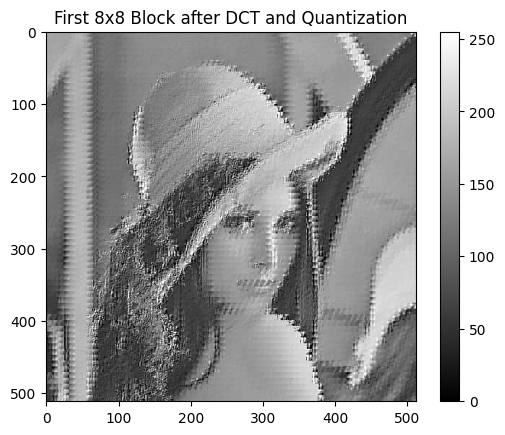

In [17]:
image_height = image_width = 64 * 8  # 512

# 블록들을 이미지로 재조합하는 함수
def combine_blocks(blocks, blocks_per_row, block_size):
    # 이미지의 높이와 너비
    image_height = blocks_per_row * block_size
    image_width = image_height  # 가정: 이미지는 정사각형이다
    
    # 빈 이미지를 생성합니다.
    image = np.zeros((image_height, image_width), dtype=np.float32)
    
    # 각 블록을 올바른 위치에 배치합니다.
    for block_idx, block in enumerate(blocks):
        # 블록의 행과 열 위치를 계산합니다.
        row = (block_idx // blocks_per_row) * block_size
        col = (block_idx % blocks_per_row) * block_size
        
        # 이미지에 블록을 배치합니다.
        image[row:row+block_size, col:col+block_size] = block
    
    return image

# 모든 블록을 하나의 이미지로 합칩니다.
full_image = combine_blocks(shifted_blocks, blocks_per_row=64, block_size=8)

# full_image가 최종 이미지입니다. 값을 출력하거나 이미지로 저장할 수 있습니다.
# 이미지 값을 0과 255 사이로 클리핑합니다.
full_image = np.clip(full_image, 0, 255).astype(np.uint8)

# 이미지를 확인합니다(여기서는 값을 출력합니다).
print(full_image)
plt.imshow(full_image, cmap='gray')
plt.title('First 8x8 Block after DCT and Quantization')
plt.colorbar()
plt.show()